<a href="https://colab.research.google.com/github/selsaady1/MAT-421-Elsaady/blob/main/Module_B_PART2(Elsaady).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Module B PART 2, Chapter 17 Interpolation
## Saif Elsaady
## MAT 421, January 29 2023

In [ ]:
## 17.4 Lagrange Polynomial Interpolation

A single polynomial that spans the all of the data points is found using Lagrange polynomial interpolation. As an interpolation function, this polynomial, also known as a Lagrange polynomial, or L(x), should possess the property L(xi)=yi for each point throughout the data set. An example problem is shown below:

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

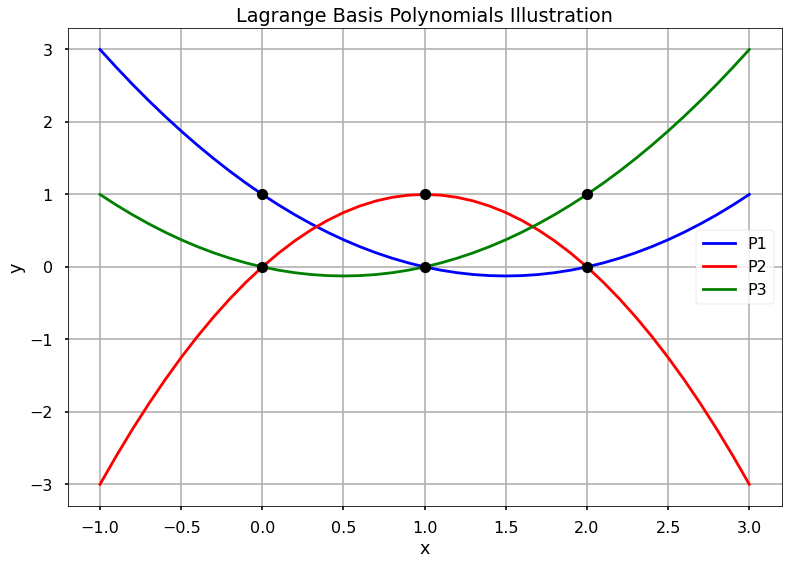

In [11]:
import numpy as np #importing appropriate libraries
import numpy.polynomial.polynomial as poly #importing appropriate libraries
import matplotlib.pyplot as plt #importing appropriate libraries

x = [0,1,2]
y = [1,3,2]
P1 = [1,-1.5,.5] #datasets
P2 = [0, 2,-1] #datasets
P3 = [0,-.5,.5] #datasets
P1 = poly.Polynomial(P1) #polynomial function
P2 = poly.Polynomial(P2) #polynomial function
P3 = poly.Polynomial(P3) #polynomial function

x_new = np.arange(-1, 3.1, 0.1) 
plt.plot(x_new, P1(x_new), 'b', label = 'P1') #labeling and graphic curves legend for color
plt.plot(x_new, P2(x_new), 'r', label = 'P2') #labeling and graphic curves legend for color
plt.plot(x_new, P3(x_new), 'g', label = 'P3') #labeling and graphic curves legend for color

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials Illustration')
plt.xlabel('x') #xlabel
plt.ylabel('y') #ylabel
plt.grid() #illustration
plt.legend() #illustration
plt #illustration

Outside of the interval [x1,xn], which is the sector of interpolation, Lagrange interpolation polynomials are described. Outside of this area, they will grow quickly and unboundedly. This feature is undesirable because the underlying data generally do not behave in this way.

Below we take the repvious example and attempt to verify (successful attempt) that it passes through each data point.

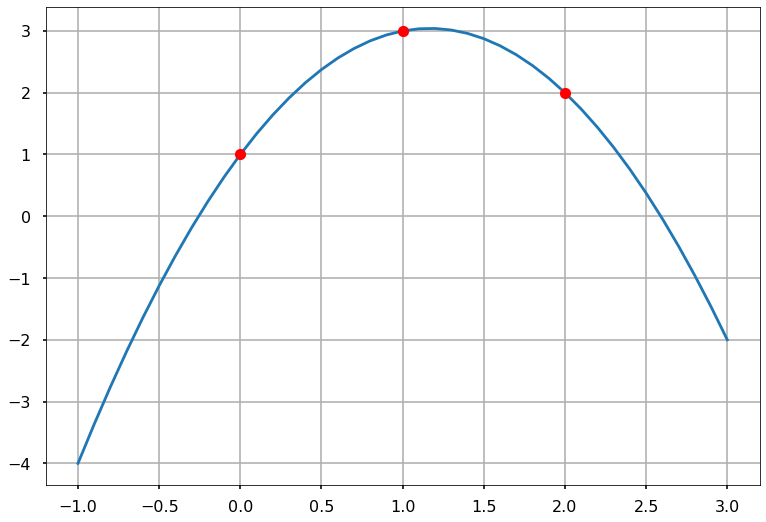

In [17]:
L = P1 + 3*P2 + 2*P3

plt.plot(x_new, L(x_new), x, y, 'ro')
plt.grid() #illustration
plt.show() #illustration

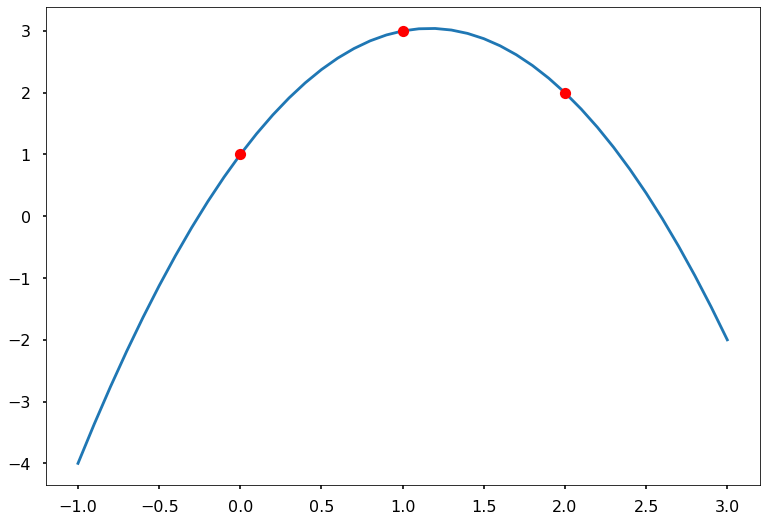

In [18]:
from scipy.interpolate import lagrange
f = lagrange(x, y) #larange function computes all the same
plt.plot(x_new, f(x_new), x, y, 'ro')
plt.show()

In [ ]:
## 17.5 Newton’s Polynomial Interpolation

Newtons polynomial interpolation is another way to a set of data values. The following is an n-1 order of newtons polynomial that goes through n points:
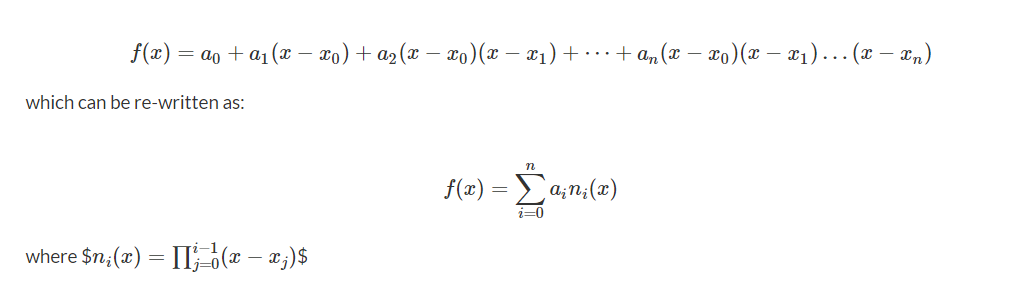

Newtons interpolation method is unique because once the coefficiants are accounted for, the new data values added will not change the already calulated values. The Newton's polynomial has the unique property that the coefficients can be found through a very straightforward mathematical process. For instance, since the polynomial passes through each data point, we will have f(xi)=yi for data set (xi,yi).

In this problem below the divided differences tables of x = [-5.1,-2.54,0,1.2], y = [-2.1,5.05,1,10.3] is calculated.

1.)

In [25]:
import numpy as np #libraries imported
import matplotlib.pyplot as plt #libraries imported
plt.style.use('seaborn-poster') #style
%matplotlib inline

In [28]:
def divided_diff(x, y):
    n = len(y) #divided differences calculated in this function
    value = np.zeros([n, n]) #1st column is y
    value[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            value[i][j] = \
           (value[i+1][j-1] - value[i][j-1]) / (x[i+j]-x[i])    
    return value
def newton_poly(value, x_data, x):
    n = len(x_data) - 1 
    p = value[n]
    for k in range(1,n+1):
        p = value[n-k] + (x -x_data[n-k])*p
    return p

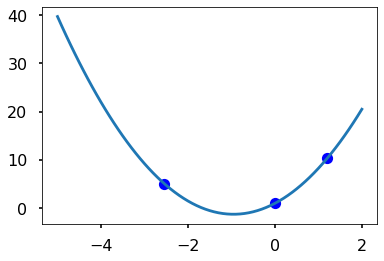

In [29]:
x = np.array([-2.54,0,1.2])
y = np.array([5.05,1,10.3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# new data point evaluation 
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

The Newton's polynomial can be seen to cross every data point and match the data.